In [5]:
# Import the libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for nicer plots
import re # regular expressions

# Read the data
toolik_fish = pd.read_csv(
    # Path to the data
    "../data/raw_data/toolik_fish.csv",
    # not a number values are "#N/A"
    na_values=["#N/A", "."]
    )

In [6]:
toolik_fish.head()

,Date,Site,Lake,Fish I.D.,Species,Total length (mm),FL (mm),SL (mm),Mass (g),Sampling,...,Mature,Gonads,P1,Age,Total otolith radius,DO1..DO52,Fin clip,Locality,Scales,Comments
0,15-Jul-1995,160.0,Campsite Lake,NaN,CHAR,444.0,NaN,NaN,700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15-Jul-1995,160.0,Campsite Lake,NaN,CHAR,612.0,NaN,NaN,2150.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-Jul-1995,160.0,Campsite Lake,NaN,L.Trout,672.0,NaN,NaN,2100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO TAG
3,15-Jul-1995,160.0,Campsite Lake,NaN,L.Trout,549.0,NaN,NaN,1450.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-Jul-1995,160.0,Campsite Lake,NaN,L.Trout,486.0,NaN,NaN,1500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def snakecase(s):
        """Convert CamelCase to snake_case and lowercase the string
        s: string
        """
        s = re.sub(
        # Find a lower case letter or number (group 1)
        # followed by an upper case letter (group 2):
        '([a-z0-9])([A-Z])',
        # Replace with - 
        # \1, the lower case letter, 
        # _, an underscore, and
        # \2, the upper case letter:
        r'\1_\2',
        # Perform the search and replace in 
        # the string s:
        s 
        )
        s = re.sub(
                ' ', # Find a space
                '_', # Replace with an underscore
                s    # In the string
                ).lower()  # Convert to lower case
        return s

print(snakecase("HelloWorld"))

hello_world


In [10]:
toolik_fish.columns = [
    # Replace spaces with underscores and lowercase labels
    # for each col in toolik_weather.columns
    snakecase(col) for col in toolik_weather.columns
]

# Check the cleaned column names
toolik_fish.columns

Index(['date', 'site', 'lake', 'fish_i.d.', 'species', 'total_length_(mm)',
       'fl_(mm)', 'sl_(mm)', 'mass_(g)', 'sampling', 'otos', 'stomach', 'sex',
       'mature', 'gonads', 'p1', 'age', 'total_otolith_radius', 'do1..do52',
       'fin_clip', 'locality', 'scales', 'comments'],
      dtype='object')

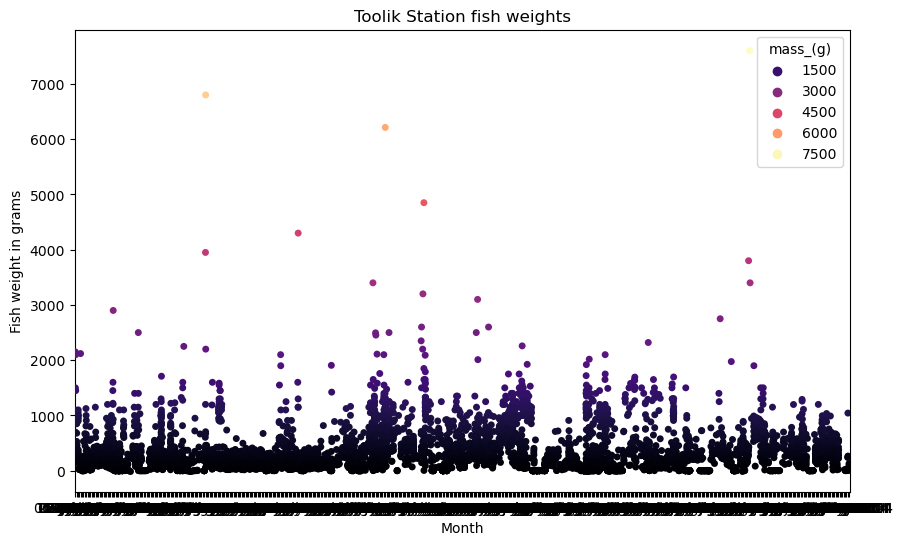

In [14]:
fig = plt.figure(figsize=(10, 6)) # This command sets the size of the figure

sns.stripplot( # This command creates the data visualization (a strip plot)
    # The data argument sets the data that will be used to create
    # the plot. In this case, the data is the toolik_weather data
    # frame:
    data=toolik_fish, 
    # The next two arguments set the x and y axes. In this case,
    # the x axis is set to the month column and the y axis is set
    # to the daily air temperature column:
    x='date', 
    y='mass_(g)', 
    jitter=0.2, # This sets the jitter of the points on the x axis
    # The hue argument sets the color of the points. In this case, 
    # the color is set by the daily air temperature:
    hue='mass_(g)', 
    # The palette is the set of colors that
    # will be used to color the points. In this case, the palette
    # is set to the viridis palette, which is a colorblind-friendly
    # palette:
    palette='magma' 
)

# The title command sets the title of the plot
plt.title("Toolik Station fish weights")
# The xlabel command sets the x axis label
plt.xlabel("Month")
# The ylabel command sets the y axis label
plt.ylabel("Fish weight in grams")

# Finally, the .show() function displays the plot
# in the notebook output.
plt.show()